In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', palette='muted')
pd.set_option('display.notebook_repr_html', True)
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(0)

In [2]:
df = pd.read_csv("GTExdata.csv")

In [3]:
df.shape

(1640, 16142)

In [4]:
from scipy.linalg import svd 
from scipy.sparse.linalg import svds

from scipy.sparse.linalg import eigs

u, s, vt = svd(df)

# PUNTO 1
## PUNTO a
No se le puede calcular los autovalores a una matriz no cuadrada, interpretare como que me pidieron los valores singulares.

https://math.stackexchange.com/questions/583938/do-non-square-matrices-have-eigenvalues


Text(0,0.5,'Energia')

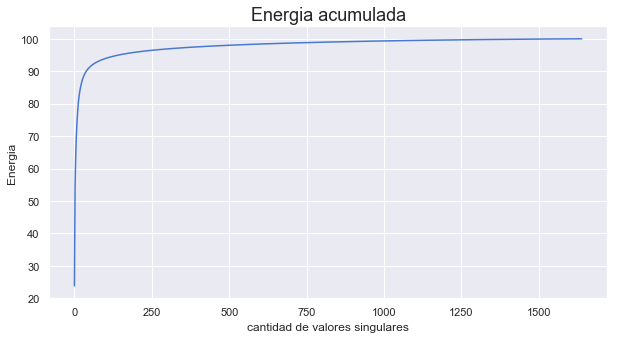

In [5]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)

graficarEnergiaPorcentaje = []

acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    graficarEnergiaPorcentaje.append(acumulated_energy)
    
plt.figure(figsize=(10,5))
plt.plot(graficarEnergiaPorcentaje)
plt.title('Energia acumulada',size=18)
plt.xlabel('cantidad de valores singulares')
plt.ylabel('Energia')


Text(0,0.5,'Cantidad de valores singulares')

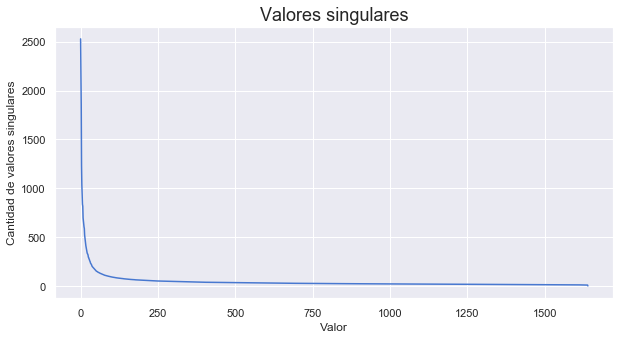

In [6]:
plt.figure(figsize=(10,5))
plt.plot(s)
plt.title('Valores singulares',size=18)
plt.xlabel('Valor')
plt.ylabel('Cantidad de valores singulares')


## PUNTO b

Una buena aproximacion podria ser a los 100  autovalores, ya casi se acumulo toda la energia.

In [7]:
graficarEnergiaPorcentaje[100]

93.93588698254825

## PUNTO c

In [8]:
datosEnDosDim =u[:, :2]
df_l = pd.read_csv("SampleLabels.csv")

In [9]:
df_DosDim = pd.DataFrame(datosEnDosDim)
df_DosDim = df_DosDim.join(df_l[['Tissue type']])
df_DosDim.rename(columns={0:'x', 1:'y'}, inplace=True)

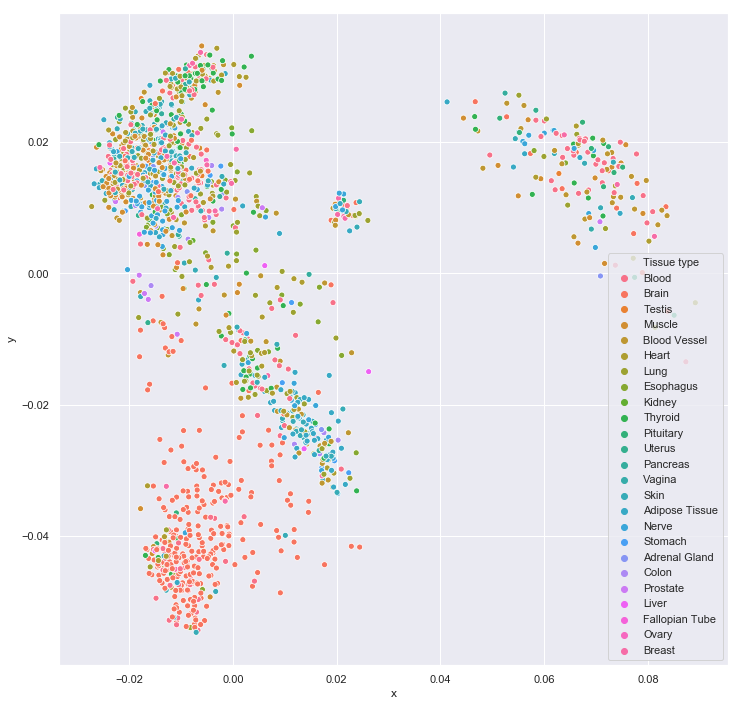

In [10]:
plt.figure(figsize=[12,12])
g = sns.scatterplot(x='x', y='y', data=df_DosDim, hue='Tissue type')

# PUNTO 2

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2,perplexity=1000)

In [13]:
perplexity1 = tsne.fit_transform(df.values)

In [14]:
dfPerp1 = pd.DataFrame(perplexity1)
dfPerp1 = dfPerp1.join(df_l[['Tissue type']])
dfPerp1.rename(columns={0:'x', 1:'y'}, inplace=True)

Text(0.5,1,'TSNE con Perplexity 1000')

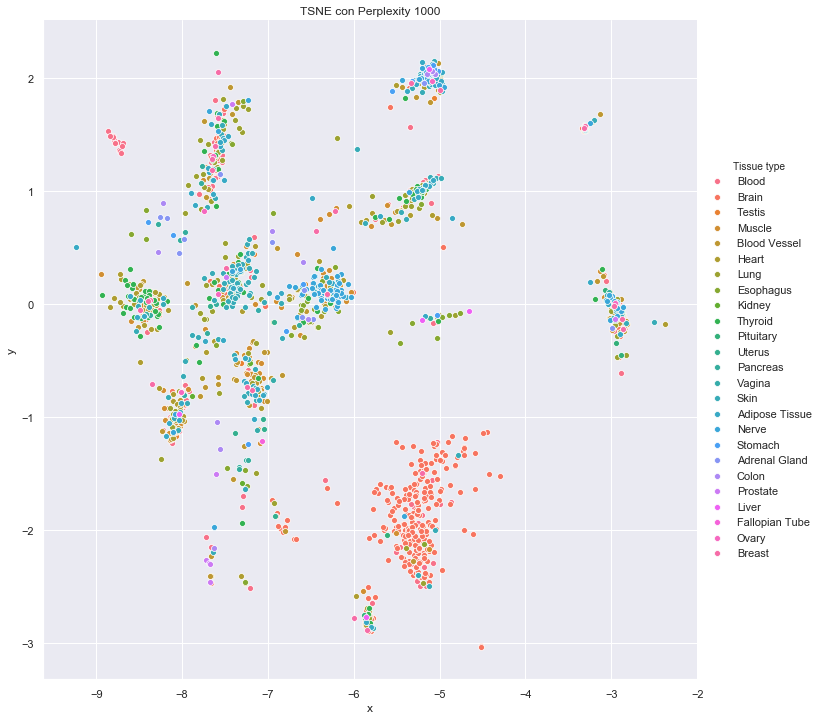

In [15]:
g = sns.pairplot(x_vars='x', y_vars='y', data=dfPerp1, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 1000')

In [16]:
tsne = TSNE(n_components=2,perplexity=100)
perplexity100 = tsne.fit_transform(df.values)

Text(0.5,1,'TSNE con Perplexity 100')

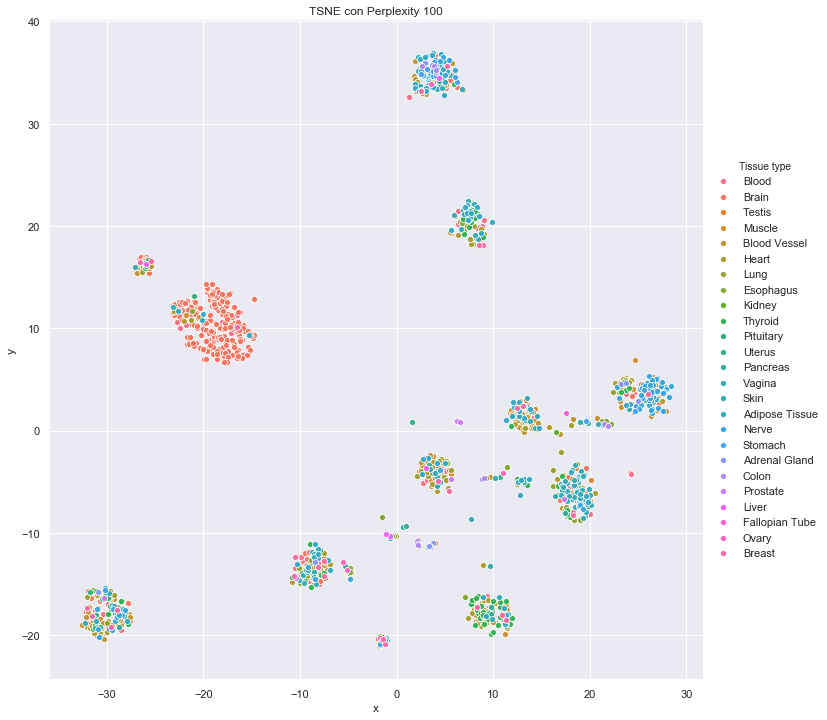

In [18]:
dfPerp100 = pd.DataFrame(perplexity100)
dfPerp100 = dfPerp100.join(df_l[['Tissue type']])
dfPerp100.rename(columns={0:'x', 1:'y'}, inplace=True)
g = sns.pairplot(x_vars='x', y_vars='y', data=dfPerp100, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 100')

In [19]:
tsne = TSNE(n_components=2,perplexity=50)
perplexity50 = tsne.fit_transform(df.values)

Text(0.5,1,'TSNE con Perplexity 50')

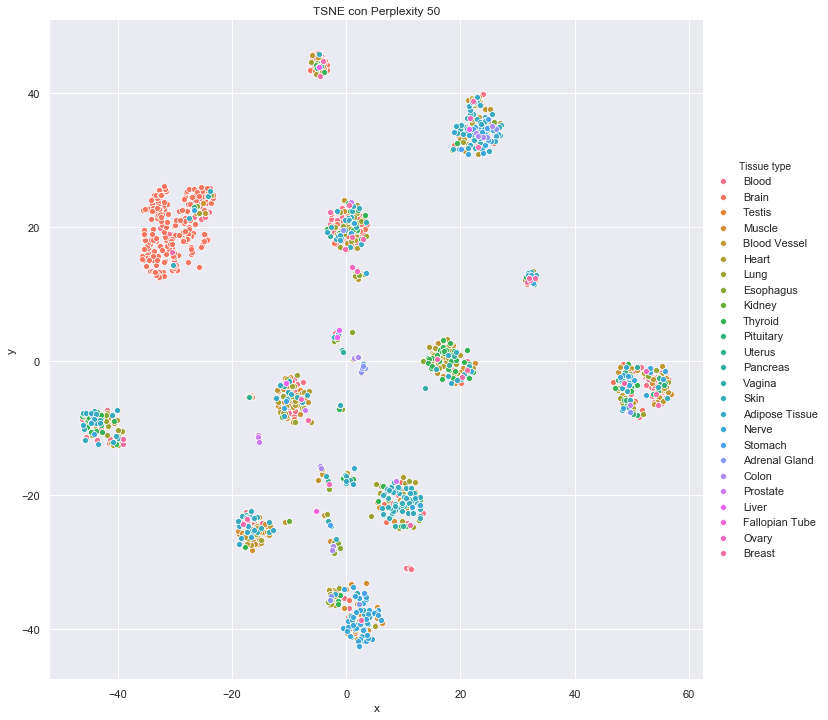

In [27]:
dfPerp50 = pd.DataFrame(perplexity50)
dfPerp50 = dfPerp50.join(df_l[['Tissue type']])
dfPerp50.rename(columns={0:'x', 1:'y'}, inplace=True)
g = sns.pairplot(x_vars='x', y_vars='y', data=dfPerp50, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 50')

In [22]:
tsne = TSNE(n_components=2,perplexity=30)
perplexity30 = tsne.fit_transform(df.values)

Text(0.5,1,'TSNE con Perplexity 30')

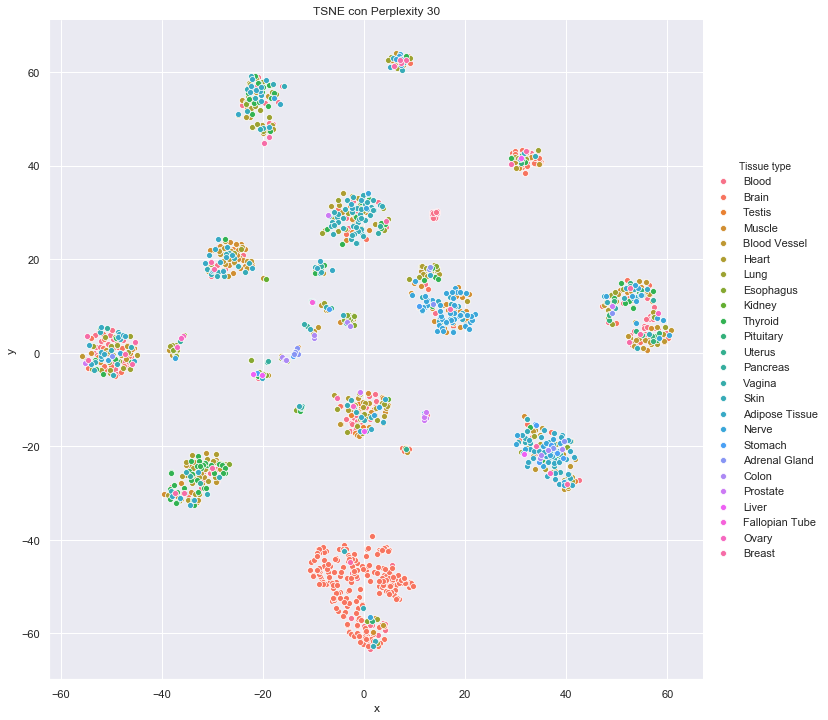

In [28]:
dfPerp30 = pd.DataFrame(perplexity30)
dfPerp30 = dfPerp30.join(df_l[['Tissue type']])
dfPerp30.rename(columns={0:'x', 1:'y'}, inplace=True)
g = sns.pairplot(x_vars='x', y_vars='y', data=dfPerp30, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 30')

In [24]:
tsne = TSNE(n_components=2,perplexity=3)
perplexity3 = tsne.fit_transform(df.values)

Text(0.5,1,'TSNE con Perplexity 3')

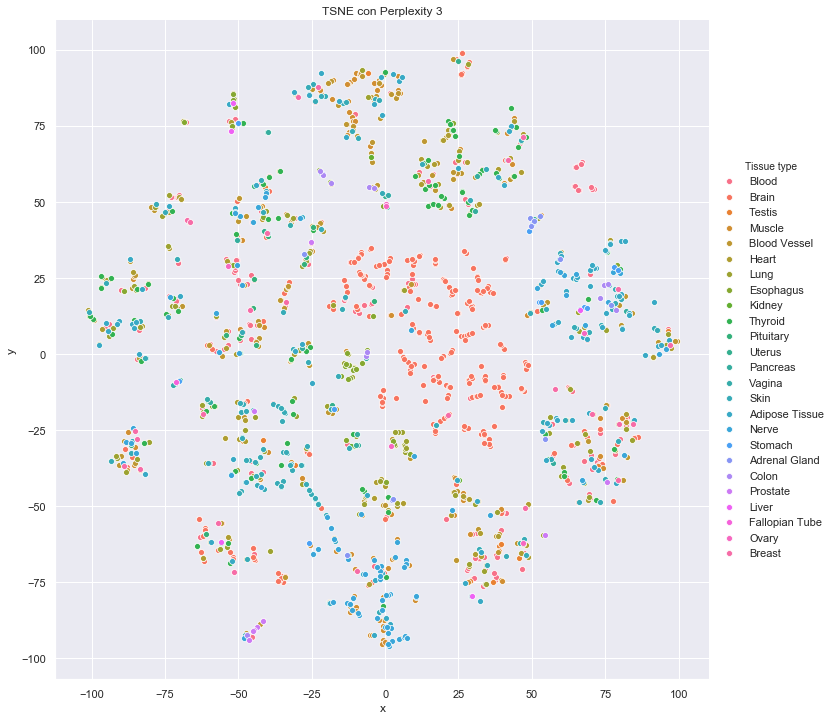

In [29]:
dfPerp3 = pd.DataFrame(perplexity3)
dfPerp3 = dfPerp3.join(df_l[['Tissue type']])
dfPerp3.rename(columns={0:'x', 1:'y'}, inplace=True)
g = sns.pairplot(x_vars='x', y_vars='y', data=dfPerp3, hue='Tissue type', height=10)
plt.title('TSNE con Perplexity 3')

Puede verse que con perplexity 3 se forman muchisimos pequeños grupos, y con perplexity de 1000 se puede ver puntos muy dispersos. Deberia usarse perplexity entre 30 a 100 parece dar buenos resultados